<a href="https://colab.research.google.com/github/ArturAubachAltes/RIVC_USRI-/blob/main/USRI_Classificaci%C3%B3_de_n%C3%BAmeros_amb_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy import array

print(tf.__version__)


2.8.2


# Red neuronal

In [ ]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()      # x = matriu(imatge)   y = el que auria de donar

11501568/11490434 [==============================] - 0s 0us/step


###Etiquetes

In [ ]:
Dic_Imatg = {}
valorss = []
contador = 0

for c in train_labels:
  if c not in Dic_Imatg.keys():
    Dic_Imatg[c] = contador
    valorss +=[c]
  contador += 1

valorss.sort(key=None,reverse=False)
print("Valors que poden tenir la etiqueta:", valorss)
print("Quantitat d'etiquetes diferents que hi ha: ", len(valorss))
print("Valor més alt que pot tenir l'etiqueta: ", max(valorss))
print("Valor més baix que pot tenir l'etiqueta: ", min(valorss))




Valors que poden tenir la etiqueta: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Quantitat d'etiquetes diferents que hi ha:  10
Valor més alt que pot tenir l'etiqueta:  9
Valor més baix que pot tenir l'etiqueta:  0


In [ ]:
Dic_Imatg

{0: 1, 1: 3, 2: 5, 3: 7, 4: 2, 5: 0, 6: 13, 7: 15, 8: 17, 9: 4}

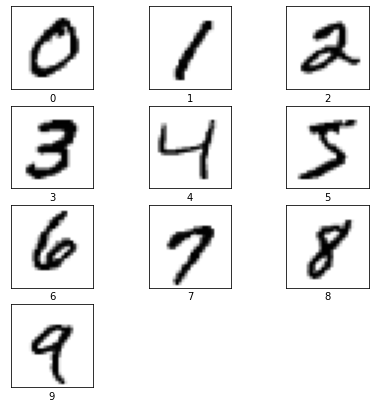

In [ ]:
num_de_valors=len(Dic_Imatg)
if type(num_de_valors/3)==float:
  files = num_de_valors//3 +1
else:
  files = num_de_valors//3

contador2 = 1
columnes = 3

plt.subplots(figsize=(7, 7))

for i in valorss:
  plt.subplot(files, columnes, contador2)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[Dic_Imatg[i]], cmap=plt.cm.binary) # etiqueta ben definida: plt.xlabel(train_labels[Dic_Imatg[i]])
  plt.xlabel(i)
  contador2= contador2 +1


In [ ]:
a=[5,6,7,8,9]

In [ ]:
#Treure el 5,6,7,8,9 
train_labels_c = train_labels
train_images_c = train_images

test_labels_c = test_labels
test_images_c = test_images

for i in a:
  ##Entrenament
  result_1= np.where(train_labels_c == i)
  result_1 = list(result_1)

  train_labels_8 = np.setdiff1d(train_labels_c, i, assume_unique=True) #assume_unique assomeix que es repeteixen els valors
  train_images_8 = np.delete(train_images_c, result_1, axis=0)


  ##Test
  result_2= np.where(test_labels_c == i)
  result_2 = list(result_2)

  test_labels_8 = np.setdiff1d(test_labels_c, i, assume_unique=True)
  test_images_8 = np.delete(test_images_c, result_2, axis=0)



  train_labels_c = train_labels_8
  train_images_c = train_images_8

  test_labels_c = test_labels_8
  test_images_c = test_images_8


In [ ]:
test_labels_8

array([2, 1, 0, ..., 2, 3, 4], dtype=uint8)

In [ ]:
Dic_Imatg = {}
valorss = []
contador = 0

for c in train_labels_8:
  if c not in Dic_Imatg.keys():
    Dic_Imatg[c] = contador
    valorss +=[c]
  contador += 1

valorss.sort(key=None,reverse=False)
print("Valors que poden tenir la etiqueta:", valorss)
print("Quantitat d'etiquetes diferents que hi ha: ", len(valorss))
print("Valor més alt que pot tenir l'etiqueta: ", max(valorss))
print("Valor més baix que pot tenir l'etiqueta: ", min(valorss))




Valors que poden tenir la etiqueta: [0, 1, 2, 3, 4]
Quantitat d'etiquetes diferents que hi ha:  5
Valor més alt que pot tenir l'etiqueta:  4
Valor més baix que pot tenir l'etiqueta:  0


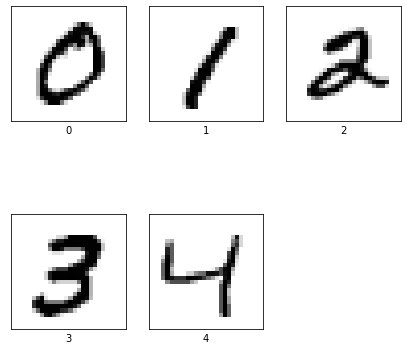

In [ ]:
#@title Mostrar possibles etiquetes
num_de_valors=len(Dic_Imatg)
if type(num_de_valors/3)==float:
  files = num_de_valors//3 +1
else:
  files = num_de_valors//3

contador2 = 1
columnes = 3

plt.subplots(figsize=(7, 7))

for i in valorss:
  plt.subplot(files, columnes, contador2)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images_8[Dic_Imatg[i]], cmap=plt.cm.binary) # etiqueta ben definida: plt.xlabel(train_labels[Dic_Imatg[i]])
  plt.xlabel(i)
  contador2= contador2 +1

In [ ]:
#Definir nova etiqueta
class_names = ['Zero','Un', 'Dos', 'Tres', 'Quatre']
print()
print("Traduccio de les etiquetes:", class_names)


Traduccio de les etiquetes: ['Zero', 'Un', 'Dos', 'Tres', 'Quatre']


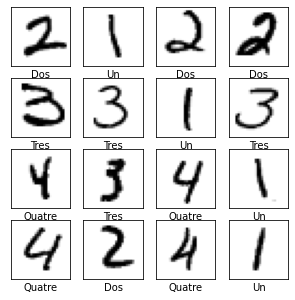

In [ ]:
#@title Mostrar resultats amb etiquetes "de forma aleatòria"
import random 
files = 4
columnes = 4

plt.subplots(files,columnes, figsize=(5, 5))

h = len(train_images_8)-1

for i in range(files*columnes):
  num_de_imatge = random.randint(0, h)
  plt.subplot(files,columnes, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images_8[num_de_imatge], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels_8[num_de_imatge]]) #ficar al principi la etiqueta del nom si ha estat mod



###Preparacio

In [ ]:
#@title Format actual dades


print("train_images:")
print("shape   -", train_images_8.shape)
print("dtype   -", train_images_8.dtype)
print("max     -", np.max(train_images_8))
print("min     -", np.min(train_images_8))
print()
print("test_images:")
print("shape   -", test_images_8.shape)
print("dtype   -", test_images_8.dtype)
print("max     -", np.max(test_images_8))
print("min     -", np.min(test_images_8))




train_images:
shape   - (30596, 28, 28)
dtype   - uint8
max     - 255
min     - 0

test_images:
shape   - (5139, 28, 28)
dtype   - uint8
max     - 255
min     - 0


In [ ]:
#Reajustar dades

#Shape   
train_images_8_M = train_images_8.reshape((train_images_8.shape[0], 28, 28, 1))
test_images_8_M = test_images_8.reshape((test_images_8.shape[0], 28, 28, 1))

#Dtype i Max/Min
train_images_8_M = train_images_8_M.astype("float32") / np.max(train_images)
test_images_8_M = test_images_8_M.astype("float32") / np.max(test_images)


In [ ]:
#@title Format dades final



print("Nou train_images:")
print("shape   -", train_images_8_M.shape)
print("dtype   -", train_images_8_M.dtype)
print("max     -", np.max(train_images_8_M))
print("min     -", np.min(train_images_8_M))
print()
print("Nou test_images:")
print("shape   -", test_images_8_M.shape)
print("dtype   -", test_images_8_M.dtype)
print("max     -", np.max(test_images_8_M))
print("min     -", np.min(test_images_8_M))



Nou train_images:
shape   - (30596, 28, 28, 1)
dtype   - float32
max     - 1.0
min     - 0.0

Nou test_images:
shape   - (5139, 28, 28, 1)
dtype   - float32
max     - 1.0
min     - 0.0


In [ ]:
#Realizar el aumento de datos con varias transformaciones. Al final, graficar 10 como ejemplo
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
#    shear_range=90,
    zoom_range=[1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(train_images_8_M)



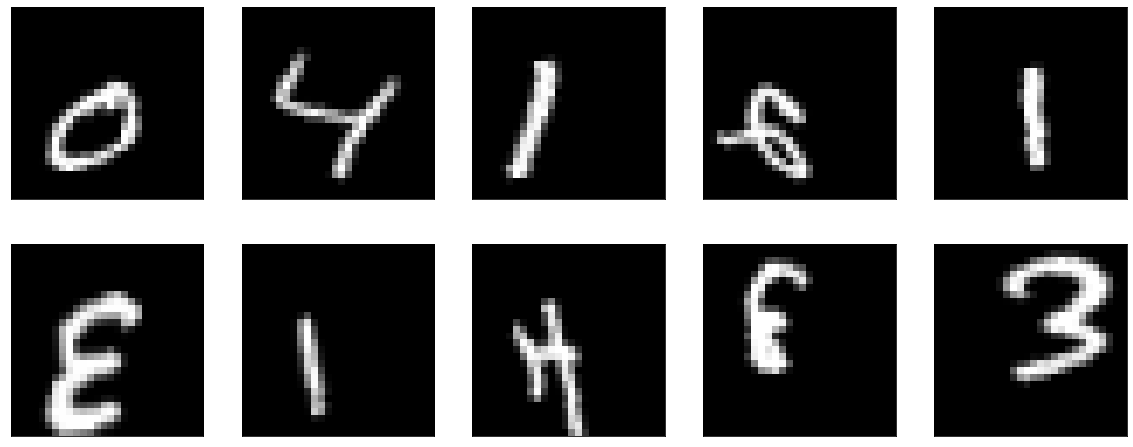

In [ ]:
plt.figure(figsize=(20,8))


for imagen, etiqueta in datagen.flow(train_images_8_M, train_labels_8, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(28, 28), cmap="gray")
    
  break

###Red

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


In [ ]:
#Estructurar
#@title Estructurar

red = Sequential()
red.add(Conv2D(32, (7, 7), activation='sigmoid', input_shape=(28, 28, 1))) 
red.add(MaxPooling2D((2, 2)))  

red.add(Conv2D(64, (3,3), activation='sigmoid'))
red.add(MaxPooling2D(2,2))
red.add(Dropout((0.5)))

red.add(Conv2D(128, (3,3), activation='sigmoid'))
red.add(MaxPooling2D(2,2))
red.add(Dropout((0.5)))

red.add(Flatten())
red.add(Dense(100, activation='relu'))
red.add(Dense(5, activation="softmax"))


red.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         7

In [ ]:
#Les dades per entrenar sortiran del datagen, de manera que siguin generades amb les transformacions que indiquem
data_gen_entrenamiento = datagen.flow(train_images_8_M, train_labels_8, batch_size=32)

In [ ]:
#Aprenentatge 


optimizer = 'Adam' 
loss = 'sparse_categorical_crossentropy' 
metrica = 'accuracy' 

metrics = [metrica]

red.compile(optimizer, loss, metrics)



In [ ]:
#Crear carpeta on s'importarà el model  (El model no es descargara al teu PC nomes a "archivos" del treball, que al sortir del programa s'esborrara automàticament.)
!mkdir training_1
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Marcar que guardi el model a cada "Epoch"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
#@title Entrenament (Pas no obligatori si ja disposes de la "red neuronal" ja descargada!!!!)
#Entrenament 
TAMANY_LOTE = 16
epocas = 50

history = red.fit(
    data_gen_entrenamiento,
    epochs=epocas,
    batch_size=TAMANY_LOTE,
    validation_data=(test_images_8_M, test_labels_8),
    callbacks=[cp_callback]
)

Epoch 1/50
956/957 [============================>.] - ETA: 0s - loss: 1.4924 - accuracy: 0.2921
Epoch 1: saving model to training_1/cp.ckpt
957/957 [==============================] - 25s 13ms/step - loss: 1.4919 - accuracy: 0.2924 - val_loss: 1.1515 - val_accuracy: 0.4674
Epoch 2/50
954/957 [============================>.] - ETA: 0s - loss: 0.9623 - accuracy: 0.5907
Epoch 2: saving model to training_1/cp.ckpt
957/957 [==============================] - 11s 12ms/step - loss: 0.9618 - accuracy: 0.5909 - val_loss: 0.7045 - val_accuracy: 0.7213
Epoch 3/50
954/957 [============================>.] - ETA: 0s - loss: 0.6770 - accuracy: 0.7115
Epoch 3: saving model to training_1/cp.ckpt
957/957 [==============================] - 11s 12ms/step - loss: 0.6773 - accuracy: 0.7115 - val_loss: 0.4763 - val_accuracy: 0.8237
Epoch 4/50
954/957 [============================>.] - ETA: 0s - loss: 0.5523 - accuracy: 0.7731
Epoch 4: saving model to training_1/cp.ckpt
957/957 [==============================] 

####Importar red (Pas prescindible si ha entrenat el model)


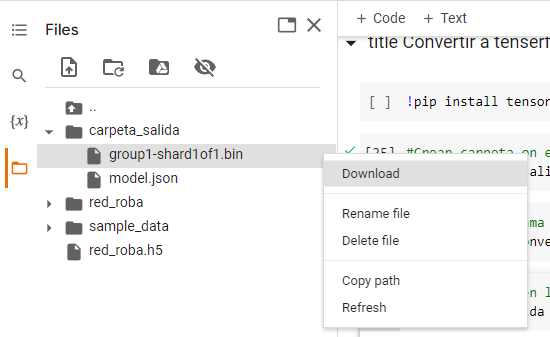

In [ ]:
red.load_weights(checkpoint_path)

###Importar

###Comprovació efectivitat

In [ ]:
test_loss, test_acc = red.evaluate(test_images_8_M,  test_labels_8)

print('Test efectivitat:', test_acc)


161/161 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9868
Test efectivitat: 0.9867678284645081


###Resultats

In [ ]:
import ipywidgets as widgets

from IPython.display import display

from ipywidgets import Button, Box, HBox, VBox, Layout, Label

In [ ]:

x_test_IMG_old = test_images_8_M.reshape(test_images_8_M.shape[0],28,28)          

#prova de la veritat   .predict()

predictions = red.predict(test_images_8_M)



In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(5))
  plt.yticks([])
  thisplot = plt.bar(range(5), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [ ]:
range(5)

range(0, 5)

In [ ]:
len(test_images_8)-1

5138

In [ ]:
#@title Nº de imatge a comprovar { run: "auto" } 

#8991 = len(test_images)-1

Enter_entre_0_i_5138= 5147#@param {type:"integer"}

button = widgets.Button(description="Mostrar resultat")
output = widgets.Output()

a = len(x_test_IMG_old)-1

def on_button_clicked(b):
  with output:
    global Enter_entre_0_i_5138
    if Enter_entre_0_i_5138 not in range(a+1):
        print("ERROR: Selecciona un valor entre 0 i",a)
    else:
      i = Enter_entre_0_i_5138
      plt.subplots(figsize=(10, 10))
      plt.subplot(4, 4, 1)
      plot_image(i, predictions[i], test_labels_8, test_images_8)
      plt.subplot(4, 4, 2)     
      plot_value_array(i, predictions[i], test_labels_8)

plt.tight_layout()
plt.show()


button.on_click(on_button_clicked)
button.style.button_color = 'lightblue' #Color
display(button, output)



<Figure size 432x288 with 0 Axes>

Button(description='Mostrar resultat', style=ButtonStyle(button_color='lightblue'))

Output()

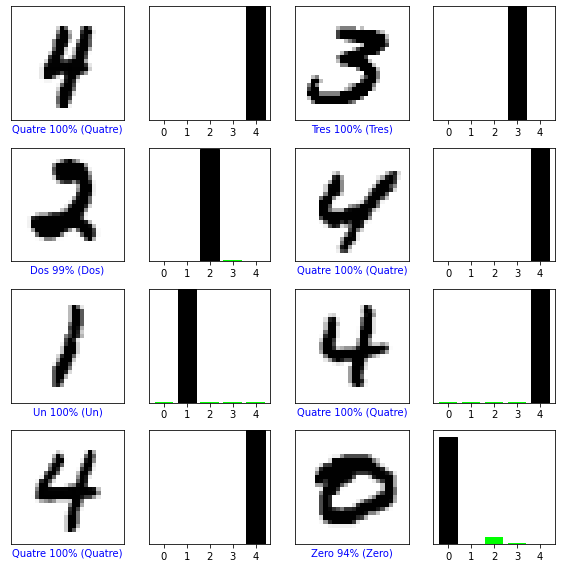

In [ ]:
#@title Mostrar resultats de forma aleatoria

num_rows = 4
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for cw in range(num_images):
  i = random.randint(np.min(test_images_8), len(test_images_8)-1)
  plt.subplot(num_rows, 2*num_cols, 2*cw+1)
  plot_image(i, predictions[i], test_labels_8, test_images_8)
  plt.subplot(num_rows, 2*num_cols, 2*cw+2)     
  plot_value_array(i, predictions[i], test_labels_8)
plt.tight_layout()
plt.show()

# PREPARAR IMATGE

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt
from numpy import array
import numpy as np
from google.colab.patches import cv2_imshow



In [ ]:
#Crear carpeta per imatges
!mkdir imatges

mkdir: cannot create directory ‘imatges’: File exists


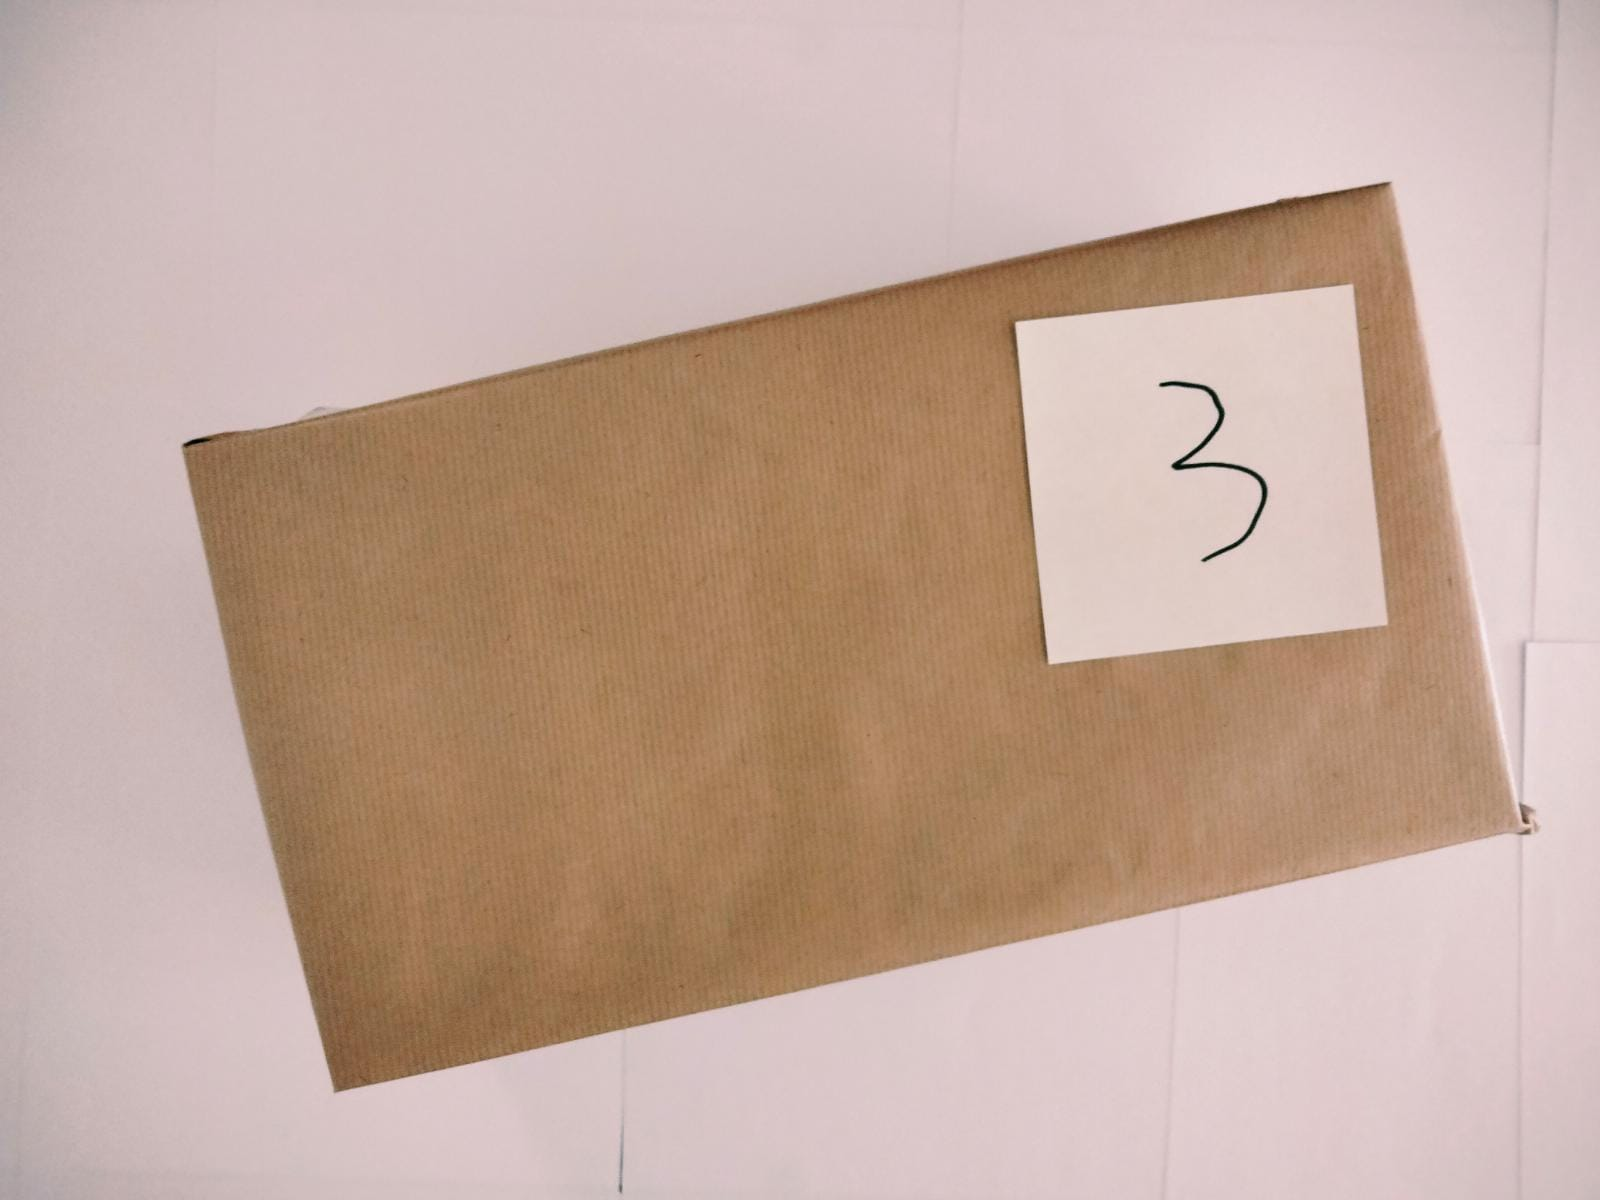

In [ ]:
#Cargar imatges
ruta= "/content/imatges/3_R.jpeg"
img=cv2.imread(ruta)
cv2_imshow(img)

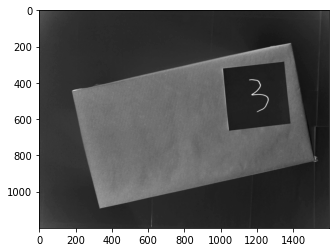

In [ ]:
#img BLANC NEGRE
img_B_N=cv2.imread(ruta,0)
plt.imshow(img_B_N,cmap=plt.cm.binary)

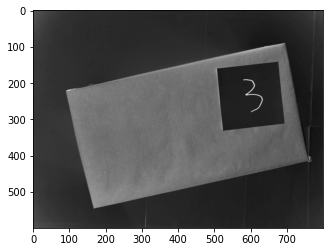

In [ ]:
#Reduir mida
img_mod_T=cv2.resize(img_B_N, (800,600), interpolation= cv2.INTER_AREA)
plt.imshow(img_mod_T,cmap=plt.cm.binary)

167.0


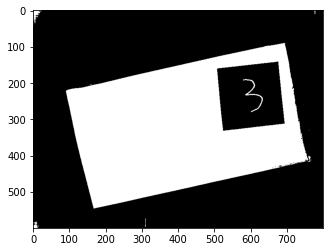

In [ ]:
#Binaritzar otsu

ret1,th1 = cv2.threshold(img_mod_T,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret1)
plt.imshow(th1,cmap=plt.cm.binary)


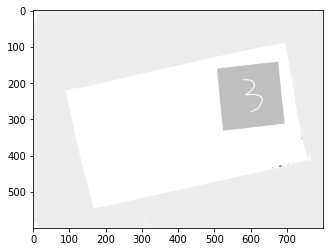

In [ ]:
#Determinar poblacions 
from skimage import measure
all_labels = measure.label(th1)
plt.imshow(all_labels,cmap=plt.cm.binary)

In [ ]:
#Recompte de poblacions 
contador_1 = 0
Dic_Imatg_1 = {}


for i in all_labels:
  contador_2 = 0
  for c in i:
    if all_labels[contador_1][contador_2] not in Dic_Imatg_1.keys():
      Dic_Imatg_1[all_labels[contador_1][contador_2]] = 1
    else:
      Dic_Imatg_1[all_labels[contador_1][contador_2]] +=1
    
    contador_2 +=1
  contador_1 +=1  


In [ ]:
#Agafar 3a població més gran

import operator

clients_sort = sorted(Dic_Imatg_1.items(), key=operator.itemgetter(1), reverse=True)
etiqueta=clients_sort[2][0]
print(etiqueta)

7


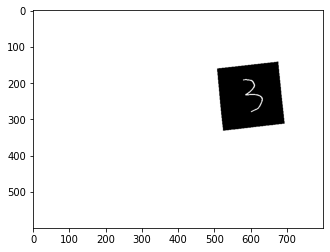

In [ ]:
img_BIN = []

contador_1 = 0


for i in all_labels:
  img_bin = []
  contador_2 = 0
  for c in i:
    if all_labels[contador_1][contador_2] == etiqueta:
      img_bin += [255]
    else:
      img_bin += [0]
    contador_2 +=1
  img_BIN +=[img_bin]
  contador_1 +=1

img_BIN_3=array(img_BIN)
plt.imshow(img_BIN_3,cmap=plt.cm.binary)

####Enquadrament

In [ ]:
#Localitzar posició de img_BIN_3
result_1= np.where(img_BIN_3 == 255)
result_1=list(result_1)
result_1

[array([142, 142, 142, ..., 331, 331, 331]),
 array([672, 673, 674, ..., 528, 529, 530])]

In [ ]:
#Cantonades de l'enquadrament
altura = max(result_1[0])
minim = min(result_1[0])


dreta =max(result_1[1])
esquerra = min(result_1[1])


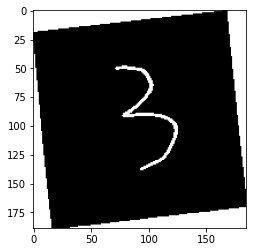

In [ ]:
#Enquadrament
Enquadrament = th1[minim:altura, esquerra:dreta]

Enquadrament=array(Enquadrament)
plt.imshow(Enquadrament,cmap=plt.cm.binary)

###4

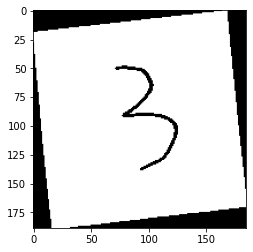

In [ ]:
#Invertir colors 1
inv_1=cv2.bitwise_not(Enquadrament)
plt.imshow(inv_1,cmap=plt.cm.binary)

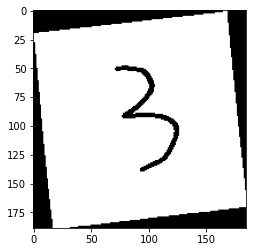

In [ ]:
#Dilatacio 
kernel = np.ones((2,2), np.uint8) 

img_dilation = cv2.dilate(inv_1, kernel, iterations=1)

plt.imshow(img_dilation,cmap=plt.cm.binary)

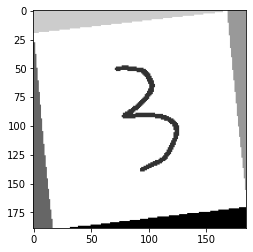

In [ ]:
#Determinar poblacions 2
all_labels_2 = measure.label(img_dilation)
plt.imshow(all_labels_2,cmap=plt.cm.binary)

In [ ]:
#Recompte de poblacions 
contador_1 = 0
Dic_Imatg_1 = {}


for i in all_labels_2:
  contador_2 = 0
  for c in i:
    if all_labels_2[contador_1][contador_2] not in Dic_Imatg_1.keys():
      Dic_Imatg_1[all_labels_2[contador_1][contador_2]] = 1
    else:
      Dic_Imatg_1[all_labels_2[contador_1][contador_2]] +=1
    
    contador_2 +=1
  contador_1 +=1  
Dic_Imatg_1

{0: 28156, 1: 1794, 2: 1361, 3: 1459, 4: 759, 5: 1436}

In [ ]:
g = []
for i in range(len(all_labels_2)):
  if all_labels_2[i][0] not in g:
    g += [all_labels_2[i][0]]

for i in range(len(all_labels_2)):
  if all_labels_2[i][len(all_labels_2[1])-1] not in g:
    g += [all_labels_2[i][len(all_labels_2[1])-1]]

for i in range(len(all_labels_2[1])):
  if all_labels_2[0][i] not in g:
    g +=[all_labels_2[0][i]]

for i in range(len(all_labels_2[1])):
  if all_labels_2[len(all_labels_2)-1][i] not in g:
    g +=[all_labels_2[len(all_labels_2)-1][i]]
g

[1, 0, 3, 2, 5]

In [ ]:
result= np.where(Enquadrament == 255)
on_blanc = [all_labels_2[result[0][0]][result[1][0]]]

if on_blanc not in g:
  g +=on_blanc
g

[1, 0, 3, 2, 5]

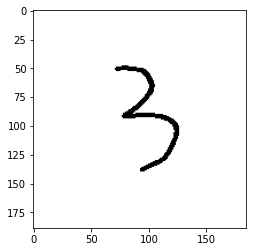

In [ ]:
img_BIN_3 = []

contador_1 = 0


for i in all_labels_2:
  img_bin = []
  contador_2 = 0
  for c in i:
    if all_labels_2[contador_1][contador_2] in g:
      img_bin += [0]
    else:
      img_bin += [255]
    contador_2 +=1
  img_BIN_3 +=[img_bin]
  contador_1 +=1

img_BIN_3=array(img_BIN_3)
plt.imshow(img_BIN_3,cmap=plt.cm.binary)

####Enquadrament

In [ ]:
#Localitzar posició de img_BIN_3
result_1= np.where(img_BIN_3 == 255)
result_1=list(result_1)
result_1

In [ ]:
#Cantonades de l'enquadrament
altura = max(result_1[0])+30
minim = min(result_1[0])-30


dreta =max(result_1[1])+30
esquerra = min(result_1[1])-30


In [ ]:
#Enquadrament
Enquadrament = img_BIN_3[minim:altura, esquerra:dreta]

Enquadrament=array(Enquadrament)
plt.imshow(Enquadrament,cmap=plt.cm.binary)

###si

In [ ]:
#Reduir imatge
img_mod1=cv2.resize(np.uint8(Enquadrament), (28,28),interpolation=cv2.INTER_AREA)
plt.imshow(img_mod1,cmap=plt.cm.binary)

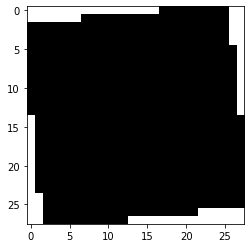

In [ ]:
#Binarització

binaria = np.uint8((img_mod1>2)*255)
plt.imshow(binaria,cmap=plt.cm.binary)

140.0


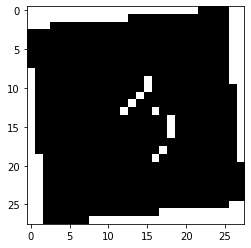

In [ ]:
ret1,th1 = cv2.threshold(img_mod1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret1)
plt.imshow(th1,cmap=plt.cm.binary)

In [ ]:
#Modificar format compatible amb la xarxa neuronal

fi=binaria.reshape(1,28,28,1)


In [ ]:
print("dtype   -", fi.dtype)

NameError: ignored

# PROBA  :/

posicio de on esta el vector 'y' mes gran ---> 3


vector 'y'---->  [[1.1440835e-10 1.6653847e-06 7.4035306e-05 9.9992347e-01 8.3394275e-07
  2.4833615e-25 7.7545563e-26 1.2412191e-24 3.7798024e-26]]




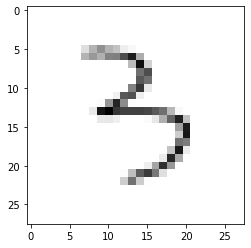

In [ ]:
plt.imshow(img_mod1, cmap=plt.cm.binary)



#prova de la veritat   .predict()

predictions = red.predict(fi)

print("posicio de on esta el vector 'y' mes gran --->", np.argmax(predictions))

print()
print()

print("vector 'y'----> ",predictions)

print()
print()